In [1]:
#Written_By_Eng. Mohammed Albhaisi M.Sc.

from nuscenes import NuScenes

#Load ground truth data
nusc = NuScenes(version='v1.0-trainval', dataroot='/home/albhaisi/Desktop/WS/data', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 22.007 seconds.
Reverse indexing ...
Done reverse indexing in 5.5 seconds.


In [10]:
import json
from nuscenes.eval.common.data_classes import EvalBoxes
from nuscenes.eval.tracking.data_classes import TrackingBox

result_path = '/home/albhaisi/Desktop/Presentation/for_automatic_test/Voxel01_original.json'
instance_to_find = '52504c169efd4a0bb1437bfb8ed5bdb9'
tracking_idd = 'car_43_3'

def load_prediction(result_path):
        #Choose which scene results to upload 
        with open(result_path) as f:
                data = json.load(f)
                result = data['results']
        all_results = EvalBoxes.deserialize(data['results'], TrackingBox)
        print(all_results)
        meta = data['meta'] 
        # How much sample in this result and number of boxes
        print("Loaded results from {}. Found detections for {} samples."
              .format(result_path, len(all_results.sample_tokens)))

        return result

prediction_results= load_prediction(result_path)

#Check_results
print(prediction_results)



EvalBoxes with 708 boxes across 40 samples
Loaded results from /home/albhaisi/Desktop/Presentation/for_automatic_test/Voxel01_original.json. Found detections for 40 samples.
{'418cbb70159341c1ada4f3ba1fb69713': [{'translation': [363.4235710607566, 1086.4217941021245, 0.7193708562917144], 'size': [1.8896936178207397, 4.413407802581787, 1.665687918663025], 'velocity': [0.0, 0.0], 'rotation': [0.8330171913854183, 0.0, 0.0, 0.5532471046976654], 'tracking_score': 0.8306690454483032, 'sample_token': '418cbb70159341c1ada4f3ba1fb69713', 'tracking_id': 'car_43_0', 'tracking_name': 'car'}, {'translation': [362.73952536605367, 1091.95066380746, 0.6752579658252477], 'size': [1.8408061265945435, 4.4202728271484375, 1.5678820610046387], 'velocity': [0.0, 0.0], 'rotation': [0.8227798400212609, 0.0, 0.0, 0.5683602157563357], 'tracking_score': 0.8293432593345642, 'sample_token': '418cbb70159341c1ada4f3ba1fb69713', 'tracking_id': 'car_43_1', 'tracking_name': 'car'}, {'translation': [368.41565861451767, 

In [6]:
#To get all gt informations for all instances in one scene

import tqdm
import numpy as np


def get_all_samples_in_scene():
        all_samples_in_scene =[]
        #To know number of annotation for all instances
        for samples in prediction_results:
                all_samples_in_scene.append(samples)
        return all_samples_in_scene

print(get_all_samples_in_scene())

#To get timestamp , sensors,annotations and other information about samples
def get_all_sample_information_in_scene():
        sample_alist=[]
        
        for sample_token in tqdm.tqdm(get_all_samples_in_scene(), leave=False):
                sample = nusc.get('sample', sample_token)
                sample_alist.append(sample)
        return sample_alist

print(get_all_sample_information_in_scene())

def get_all_annotations():
        sample_annotation_tokens_list=[]
        for annotation_tokens in get_all_sample_information_in_scene():
                sample_annotation_tokens1 = annotation_tokens['anns']  # Get all annotations for all instances
                sample_annotation_tokens_list.append(sample_annotation_tokens1)
        return sample_annotation_tokens_list

print(get_all_annotations())

#To get information like which instance, annotation, sample, trans,rotation,
# size, visiability and num_lidar points

def get_all_information_for_all_instances():
        samples_annotation_alist=[]
        for sampe_annotations_token in get_all_annotations():
                for s in sampe_annotations_token:
                        sample_annotation = nusc.get('sample_annotation', s)
                        samples_annotation_alist.append(sample_annotation)
                        #print(sample_annotation)
        return samples_annotation_alist

print(get_all_information_for_all_instances())


['418cbb70159341c1ada4f3ba1fb69713', '1a89f57231644ef9a941a51bc4322bdd', '25a777903d554457b6e4e5e437f21125', '92bf51f4b2c447b5a8e068e25cf1f980', '66acf00fb96648bd8d7493be238ecc8d', 'a893b19c605e41f8b9f625cd5d968960', '96d621f9ae4d44f0bf45688877a2d8fc', '9c1fc0d8c93b4a8584cc4f41d2863667', '8010cad5488d4f449a45b8ba24f97fb3', 'b416110f0fcc4aeaad2c3ea13ff0f519', '88918bab1cb841f3a0fbb92a1110fc47', 'eb9d7bc242d14e92a46c1037126cb204', '1b9f1ac3f22b410ab8d5252ebddd78d7', 'e79bf81d98084e178032acbcdd9cb909', '780457151a8a4d3a83b09dd1c7e9403b', '60321e7996b64926bfb9afd9c53b4170', '0799844f6afa4ac1840181d0c8b26f08', '6489d3f46b87471086ba9c5c1ef9266b', 'abc3bcd0053842e482d2296fc55cc405', '76919271ab6d402b908a31648191a5a4', 'a1914259fc2542dbaf82def95b83f9d5', '586d6516ca7e4c528a6a59eb470e17a8', '113f0ef12c2d455ebd676580a8bb9d57', 'f5fa686f58434bb3b199e4d87be19261', '4e39dbe32cc443a4bfd5fb620628472c', '18e40c605a454373ad2074ec5429745c', '2ee49140790544d8b01f52813ba9444c', '1fde5dec10c4471d97b84c1074

[{'token': '418cbb70159341c1ada4f3ba1fb69713', 'timestamp': 1533201555449770, 'prev': '', 'next': '1a89f57231644ef9a941a51bc4322bdd', 'scene_token': '6d872d1448814fd189e631b1187c3771', 'data': {'RADAR_FRONT': 'ac2417c8592d4f63a686783e103e747a', 'RADAR_FRONT_LEFT': '9b638159b52449b8aaa337a4557c4bcc', 'RADAR_FRONT_RIGHT': '4075e5168e5d44b99a467f9762c5c60c', 'RADAR_BACK_LEFT': '7c74d242d7f6440293998df23112eb0e', 'RADAR_BACK_RIGHT': 'd34ef672c0cd428aab3e369f6aae9f99', 'LIDAR_TOP': '8545140fcc7d4bbb98060daefce0cc18', 'CAM_FRONT': 'c64738ef4ce045468be62cae69f698b1', 'CAM_FRONT_RIGHT': 'd08028fee39d4a5095ece885138cf29f', 'CAM_BACK_RIGHT': 'a89ac775e1ec4bd3a1c42f1326a7917d', 'CAM_BACK': '1ed8bc71e8c34860ad55746cb75bfc93', 'CAM_BACK_LEFT': '7fc06b661a5545ada417150d587fc778', 'CAM_FRONT_LEFT': 'a504a0d381fa4ac3a5f7ee7b6030ec8a'}, 'anns': ['bc73fd9ab2a44418847ff2e21b428dae', '937ed02007f241be8c42b5c3e19c245c', '942e9e97a00d4a17baf27b09c054660d', '5a63450571b44c0abe011d57e1199a4d', '0959fb3d5cfd43

[['bc73fd9ab2a44418847ff2e21b428dae', '937ed02007f241be8c42b5c3e19c245c', '942e9e97a00d4a17baf27b09c054660d', '5a63450571b44c0abe011d57e1199a4d', '0959fb3d5cfd43af9a67060e8248169d', '36eb68e8803f4cbba72e26dcab90abe7', '2839dce28d4c4c8695add406bb00db23', 'ceb0e238fe4444b88843bbbc9f5e3585', '68b8f09e4ffa428ba3e20d176cbd09e6', '090802bd67bc480e84e879b797a85910', '971aed12f1d94bb5a43b349c3b3cd43c', '708a713c6c54442ab317acd75132d110', 'dff9177911024c44bc790af6a3c4d7ec', '9059859ee1ee4b239274e72e95bf5406', '0f4b94e6fc12468a993fa1b0f4ace23d', '9aa0bcd354fb4348ab8dce0d75753d67', 'd342076e69864e39aaaef4c6eb9d5406', 'eb7443c3e612483081bc6c5046142783', 'e654d6d254f6411d84732a4832868a42', 'e4785ea1c6de443c86f784fdac92f850', '0bc5d6295c5047af9bbcf07bb379d004', '46de258d422048c9a19cb2ed28c35864', '59c538066bae40d2b1151f682a0daaaf', '83db572a97c54eecafe9445550230bf6', 'd77b98c0f17d4e928859c5e55975d4fb', '569a62ab74be48b08206310c521883a3', '111e8e7fc6e84a9992ef899746ca8f79', 'b90906f12e314479833d97ea1

[{'token': 'bc73fd9ab2a44418847ff2e21b428dae', 'sample_token': '418cbb70159341c1ada4f3ba1fb69713', 'instance_token': 'a9313be3b9444852b3a9ff6d9a794c33', 'visibility_token': '4', 'attribute_tokens': [], 'translation': [382.616, 1098.694, 0.437], 'size': [0.421, 0.428, 0.694], 'rotation': [0.5224985647159489, 0.0, 0.0, 0.8526401643540922], 'prev': '', 'next': '50cd605bf4c7485daa5162ddf2166281', 'num_lidar_pts': 2, 'num_radar_pts': 0, 'category_name': 'movable_object.trafficcone'}, {'token': '937ed02007f241be8c42b5c3e19c245c', 'sample_token': '418cbb70159341c1ada4f3ba1fb69713', 'instance_token': '75ebf52956344cc28bbcba5e41d11b07', 'visibility_token': '4', 'attribute_tokens': ['4d8821270b4a47e3a8a300cbec48188e'], 'translation': [384.271, 1097.823, 1.131], 'size': [0.551, 0.714, 1.862], 'rotation': [0.6293203910498375, 0.0, 0.0, 0.7771459614569709], 'prev': '', 'next': '6220b5d6f37d464d9c4e11b77f69d26a', 'num_lidar_pts': 8, 'num_radar_pts': 0, 'category_name': 'human.pedestrian.adult'}, {'t

In [7]:
#To know number of annotation for one instance as well ass first-last annotation
def find_one_instance(find_instance):
    
    sample = nusc.get('instance', find_instance)
    numb_ann = sample['nbr_annotations']
    
    print("Number of annoation for this instance Found is {} annotations."
        .format(numb_ann))
    return sample

#Give the instance id
my_insatnce = find_one_instance(instance_to_find)
print(my_insatnce)




Number of annoation for this instance Found is 25 annotations.
{'token': '52504c169efd4a0bb1437bfb8ed5bdb9', 'category_token': 'fd69059b62a3469fbaef25340c0eab7f', 'nbr_annotations': 25, 'first_annotation_token': '708a713c6c54442ab317acd75132d110', 'last_annotation_token': '7deb4d5a415540a99d06605ac4c39a29'}


In [8]:

#Method 1 to get arranged annotations based on first annotation

def get_arrange_annotation_next():

        my_instance = nusc.get('instance', my_insatnce['token'])
        ann_recor = nusc.get('sample_annotation', my_instance['first_annotation_token'])
        ann_tokens_trav = set()
        ann_tokens_trav.add(ann_recor['token'])
        first_sample= ann_recor
        ann_record_list=[]
        while not ann_recor['next'] == "":
                ann_recor = nusc.get('sample_annotation', ann_recor['next'])
                ann_tokens_trav.add(ann_recor['token'])
                ann_record_list.append(ann_recor)
                
        ann_record_list1= ', '.join(map(str, ann_record_list))
        #print(ann_record_list1)
        recs2= [first_sample,ann_record_list1]
        recs2_final = ', '.join(map(str, recs2))
        return recs2_final

print(get_arrange_annotation_next())
         

{'token': '708a713c6c54442ab317acd75132d110', 'sample_token': '418cbb70159341c1ada4f3ba1fb69713', 'instance_token': '52504c169efd4a0bb1437bfb8ed5bdb9', 'visibility_token': '2', 'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'], 'translation': [352.627, 1067.133, 0.804], 'size': [2.014, 4.717, 2.007], 'rotation': [0.7874678089713519, 0.0, 0.0, 0.6163557818613032], 'prev': '', 'next': 'a3da24a2b47146a99f53dd3eb59025ab', 'num_lidar_pts': 26, 'num_radar_pts': 1, 'category_name': 'vehicle.car'}, {'token': 'a3da24a2b47146a99f53dd3eb59025ab', 'sample_token': '1a89f57231644ef9a941a51bc4322bdd', 'instance_token': '52504c169efd4a0bb1437bfb8ed5bdb9', 'visibility_token': '2', 'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'], 'translation': [353.763, 1071.105, 0.787], 'size': [2.014, 4.717, 2.007], 'rotation': [0.7874678089713519, 0.0, 0.0, 0.6163557818613032], 'prev': '708a713c6c54442ab317acd75132d110', 'next': 'e84342b6d9a34d258469a2a041061c03', 'num_lidar_pts': 27, 'num_radar_pts'

In [9]:
#Method 2 to get arranged annotations

def get_gt_info(gt_info):
        
            x_axis2=[]
            alist_translation_sa= []
            alist_size_sa= []
            alist_orientation_sa=[]
            alist_visiablity=[]
            alist_num_pts=[]
            inst_alist=[]
            l=-1
            for instances in get_all_information_for_all_instances():
                #print(instances)
                insts = instances['instance_token']
                #print(insts)
                if insts == my_insatnce['token']:
                                    #print(instances)
                                    inst_alist.append(instances)
                                    velocity=nusc.box_velocity(instances['token'])[:2]
                                    num_pts=instances['num_lidar_pts']
                                    visiablity =instances['visibility_token']
                                    #print(visiablity)
                                    translation_sa=instances['translation']
                                    size_sa=instances['size']
                                    rotation_sa=instances['rotation']
                                    #Save_all_results_as_list
                                    alist_translation_sa.append(translation_sa)
                                    alist_size_sa.append(size_sa)
                                    alist_orientation_sa.append(rotation_sa)
                                    alist_visiablity.append(visiablity)
                                    alist_num_pts.append(num_pts)
                                    l= l+1
                                    x_axis2.append(l)
            if gt_info == 'alist_num_pts':
                    return alist_num_pts
            elif gt_info == 'alist_visiablity':
                    return alist_visiablity
            elif gt_info == 'alist_translation_sa':
                    return alist_translation_sa
            elif gt_info == 'alist_size_sa':
                    return alist_size_sa
            elif gt_info == 'alist_orientation_sa':
                    return alist_orientation_sa
            elif gt_info == 'inst_alist':
                    return inst_alist
            elif gt_info == 'x_axis2':
                    return x_axis2
            
            
#Check
print(get_gt_info('alist_num_pts'))

   

[26, 27, 35, 59, 51, 24, 38, 284, 644, 875, 733, 477, 268, 230, 150, 77, 42, 50, 30, 8, 9, 13, 6, 5, 4]


In [16]:
#Choose one tracker to calculate cs and other metrics for it


def get_pred_results(pred_info):
    alist_con_score= []
    alist_translation_sr= []
    alist_size_sr= []
    alist_orientation_sr=[]

    for sampls in prediction_results:
                pred_results = prediction_results[sampls]
                #print(pred_results)
                for trackers in pred_results:
                    track_id = trackers['tracking_id']
                    #print(track_id)
                    if track_id == tracking_idd:
                            confidence_score=trackers['tracking_score']
                            size_sr = trackers['size']
                            translation_sr= trackers['translation']
                            rotation_sr= trackers['rotation']
                            #Save results to lists
                            alist_con_score.append(confidence_score)
                            alist_translation_sr.append(translation_sr)
                            alist_size_sr.append(size_sr)
                            alist_orientation_sr.append(rotation_sr)
  
    if pred_info == 'alist_size_sr':
       return alist_size_sr
    elif pred_info == 'alist_translation_sr':
          return alist_translation_sr
    elif pred_info == 'alist_orientation_sr':
          return alist_orientation_sr
    elif pred_info == 'confidence_score':
          return alist_con_score       
#Check 
print(get_pred_results('alist_size_sr'))

    

[[1.9308030605316162, 4.418555736541748, 1.7404941320419312], [2.007153848807017, 4.857425848642985, 1.8008924921353657], [1.9490038326808383, 4.67297876902989, 1.714529892376491], [1.9403665757948352, 4.640730698903401, 1.7074396905078681], [1.942251874775183, 4.681066606865555, 1.7026025266920934], [1.9727124669742135, 4.607935787553146, 1.789549342530061], [1.9294047342113443, 4.552023502858328, 1.711946564239438], [1.8902252526043757, 4.52474722992884, 1.6213278424522104], [1.8364534062121671, 4.382826618114075, 1.5707380356738319], [1.8513167744406194, 4.477286552359185, 1.5801706489956453], [1.8487111922317294, 4.471708603673106, 1.5844393904348433], [1.897771452377437, 4.5454176981246235, 1.6744402965354805], [1.8796733288274976, 4.583891042302233, 1.6597765897693462], [1.891854912299911, 4.631855412443991, 1.6743299715958218], [1.9324450251827048, 4.725975478526164, 1.7436376074814748], [1.9017068558083674, 4.717810793094465, 1.7091379714768868], [1.914333098220428, 4.728627124

In [18]:
#Calculate metrics for the one instance

from nuscenes.eval.detection.data_classes import DetectionBox
from pyquaternion import Quaternion
from nuscenes.eval.common.utils import center_distance, scale_iou,quaternion_yaw,angle_diff, yaw_diff, velocity_l2, attr_acc, cummean


def final_metrics(metric):


      alist_iou =[]
      alist_orien=[]
      alist_trans=[]
      x_axis=[]
      #print(get_pred_results('alist_size_sr'))
      for i in range(len(get_pred_results('alist_size_sr'))):
            
            
            sa = DetectionBox(size=get_gt_info('alist_size_sa')[i],translation=get_gt_info('alist_translation_sa')[i],rotation = get_gt_info('alist_orientation_sa')[i] )
            sr= DetectionBox(size=get_pred_results('alist_size_sr')[i],translation=get_pred_results('alist_translation_sr')[i],rotation = get_pred_results('alist_orientation_sr')[i] )
            #print(sr)
            #Calculate IOU
            IOU_cal = scale_iou(sa, sr)
            #Calculate translation_error
            trans_err = center_distance(sa, sr)
            #Calculate orientation error
            diff = yaw_diff(sa, sr)
            yaw_gt = quaternion_yaw(Quaternion(sa.rotation))
            yaw_est = quaternion_yaw(Quaternion(sr.rotation))
            orien_error= abs(angle_diff(yaw_gt, yaw_est, 2*np.pi))
            alist_iou.append(IOU_cal)
            alist_orien.append(orien_error)
            alist_trans.append(trans_err)
            x_axis.append(i)
      if metric == 'IOU_cal':
            return alist_iou
      elif metric == 'trans_err':
            return alist_trans
      elif metric == 'orien_error':
            return alist_orien
      elif metric == 'x_axis':
            return x_axis

#Check
print(final_metrics('trans_err'))
      

[0.18997280909791764, 0.27677011702577914, 0.09138738392728411, 0.07501930163617031, 0.2882504244648601, 0.6696429727396666, 0.10723977852180035, 0.3325555291054587, 0.5168729531151924, 0.48666897488742783, 0.285777113301388, 0.19256605071872085, 0.24145487757749542, 0.19904188762788388, 0.14468021907119452, 0.13079330583415036, 0.30802981896614245, 0.15003267172217108, 0.0562195355385526, 0.22019187419899797, 0.28043285785433153, 0.4555054527914768, 1.7986874729172342]


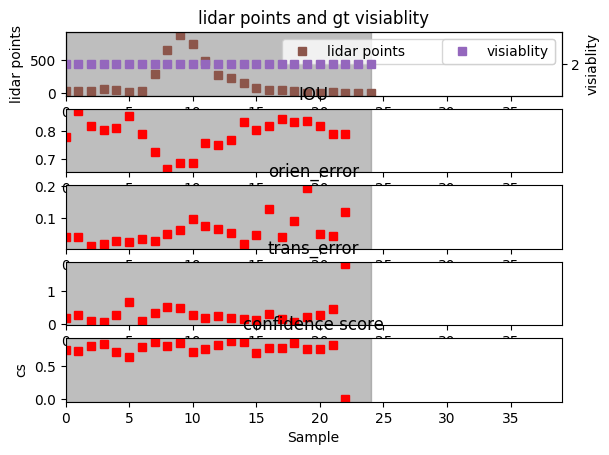

In [19]:
#Plot results
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5)

axs[0].plot(get_gt_info('x_axis2'),get_gt_info('alist_num_pts'),  'sC5')
axs[0].set_ylabel("lidar points")
axs[0].set_title("lidar points and gt visiablity")
two =axs[0].twinx()
two.plot(get_gt_info('x_axis2'),get_gt_info('alist_visiablity'),'sC4')
axs[0].set_xlim(0,39)
two.set_ylabel("visiablity")
axs[0].axvspan(0, 24, color='C7', alpha=0.5)
axs[0].legend(['lidar points                                 '])
two.legend(['visiablity'])
#####################################################################
axs[1].plot(final_metrics('x_axis'), final_metrics('IOU_cal'),'sr')
axs[1].set_xlim(0,39)
axs[1].axvspan(0, 24, color='C7', alpha=0.5)  #region of interest
axs[1].set_title("IOU")
#####################################################################
axs[2].plot(final_metrics('x_axis'), final_metrics('orien_error'),'sr')
axs[2].set_xlim(0,39)
axs[2].axvspan(0, 24, color='C7', alpha=0.5)  #region of interest
axs[2].set_title("orien_error")
#####################################################################
axs[3].plot(final_metrics('x_axis'), final_metrics('trans_err'),'sr')
axs[3].set_xlim(0,39)
axs[3].axvspan(0, 24, color='C7', alpha=0.5)  #region of interest
axs[3].set_title("trans_error")
####################################################################
#Confidence_score
axs[4].plot(final_metrics('x_axis'), get_pred_results('confidence_score'),'sr')  
axs[4].set_title("confidence score")
axs[4].set_ylabel("cs")
axs[4].set_xlabel("Sample")
#axs[4].axvline(x=18, color='C4', linestyle='-')   #where the identityswitch occours
#axs[4].axvline(x=20, color='g', linestyle='-')    #where the identityswitch occours
axs[4].axvspan(0, 24, color='C7', alpha=0.5)  #region of interest
axs[4].set_xlim(0,39)

plt.show()

In [20]:
#Save_results


ff = open('saveresults.json','w')

ff.write('Ground truth for instance \n \n')

ff.write('Size: \n \n')
ff.write(str(get_gt_info('alist_size_sa'))+"\n \n")

ff.write('translation: \n \n')
ff.write(str(get_gt_info('alist_translation_sa'))+"\n \n")

ff.write('orientation: \n \n')
ff.write(str(get_gt_info('alist_orientation_sa'))+"\n \n")


ff.write(('#################################################### \n \n'))
ff.write('prediction results for instance \n \n')

ff.write('Size: \n \n')
ff.write(str(get_pred_results('alist_size_sr'))+"\n \n")

ff.write('translation: \n \n')
ff.write(str(get_pred_results('alist_translation_sr'))+"\n \n")

ff.write('orientation: \n \n')
ff.write(str(get_pred_results('alist_orientation_sr'))+"\n \n")

ff.write(('#################################################### \n \n'))
ff.write('Final_metrics_calculation \n \n')

#ff.write('IOU = \n \n')
#ff.write(str(final_metrics("IOU_cal"))+"\n \n")

#ff.write('Translation_error = \n \n')
#ff.write(str(final_metrics("trans_err"))+"\n \n")

#ff.write('Orientation_error = \n')
#ff.write(str(final_metrics("orien_error"))+"\n \n")

ff.write('Visiablity = \n')
ff.write(str(get_gt_info('alist_visiablity'))+"\n \n")


ff.write('num_Lidar_pts = \n')
ff.write(str(get_gt_info('alist_num_pts'))+"\n \n")

ff.write('Confidence score = \n')
ff.write(str(get_pred_results('confidence_score'))+"\n \n")

#for item in final_metrics("trans_err"):
#	print(str(item))
	
#	ff.write(str(item)+"\n")

ff.close()
               